In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('VNL2023.csv',index_col=False)


df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [7]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [11]:
df.shape

(131, 10)

In [15]:
df.nunique()

Player      131
Country      16
Age          21
Attack      101
Block        65
Serve        55
Set          23
Dig          99
Receive      64
Position      5
dtype: int64

In [17]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [71]:
avg_attack_by_country=df.groupby('Country')['Attack'].mean()
avg_attack_by_country.sort_values(ascending=False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

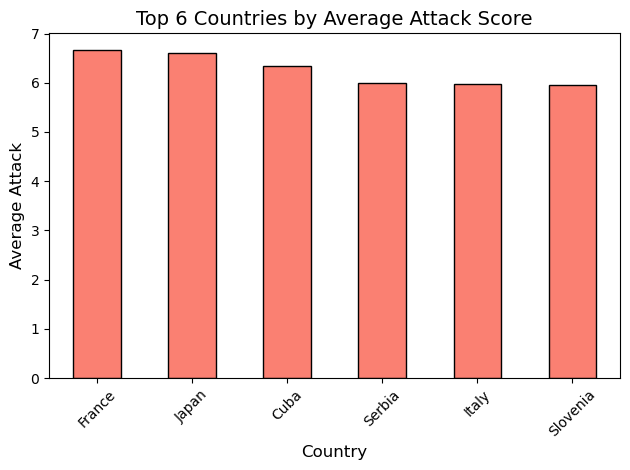

In [145]:
avg_attack_by_country.sort_values(ascending=False).head(6).plot(
    kind='bar',
    color='salmon',
    edgecolor='black'
)
plt.title('Top 6 Countries by Average Attack Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Attack', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [49]:
numeric_col=df.select_dtypes(include=['int','float']).columns
corr_matrix=df[numeric_col].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


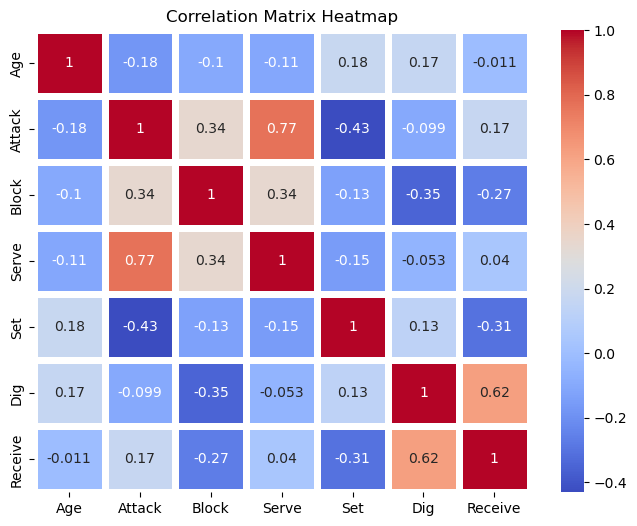

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",linewidths=5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
position_count=df['Position'].value_counts()
position_count

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

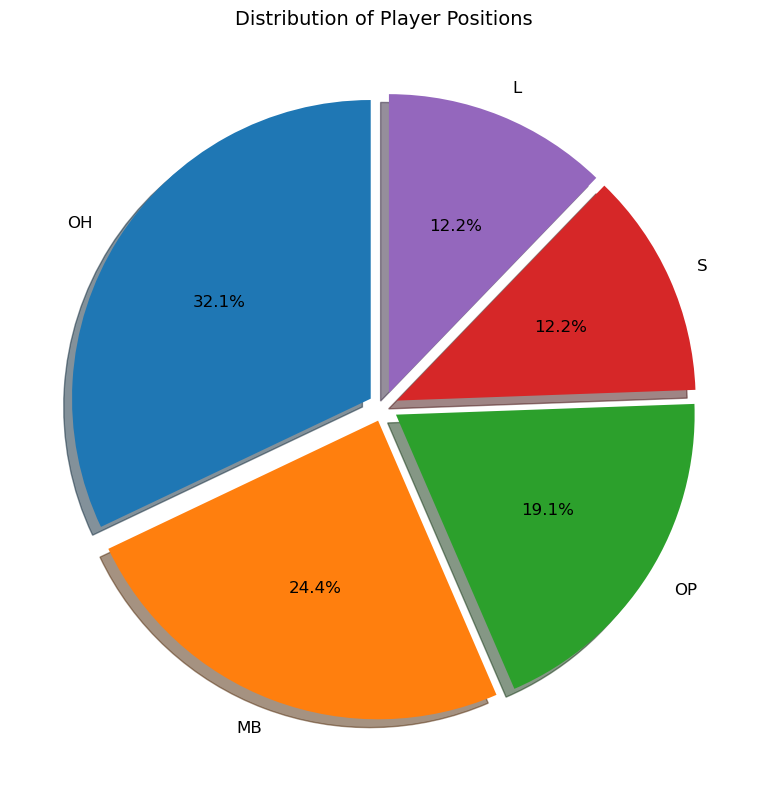

In [141]:
plt.figure(figsize=(8,8))  # Optional: makes the pie chart larger and clearer
plt.pie(
    position_count,
    labels=position_count.index,
    startangle=90,
    autopct="%1.1f%%",
    shadow=True,          
    explode=[0.05]*len(position_count),  # separates slices slightly
    textprops={'fontsize': 12}  # increases label font size
)
plt.title("Distribution of Player Positions", fontsize=14)
plt.tight_layout()
plt.show()

In [79]:
avg_serve_by_age=df.groupby('Age')['Serve'].mean()
avg_serve_by_age.sort_values(ascending=False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [83]:
df.groupby(['Country', 'Position'])['Attack'].max().reset_index().sort_values(by='Attack', ascending=False).head(20)


,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [95]:
df.groupby('Country')['Dig'].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

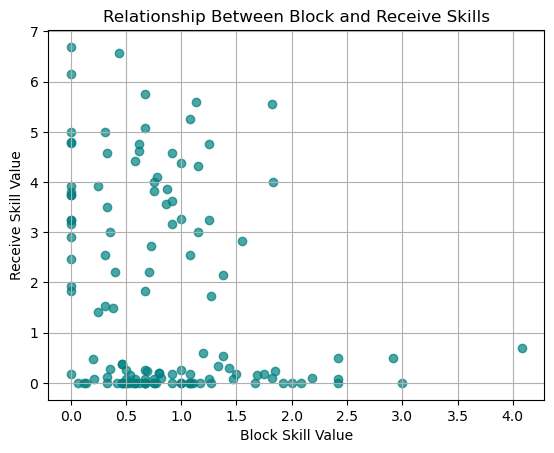

In [139]:
plt.scatter(df['Block'], df['Receive'], color='teal', alpha=0.7)
plt.title("Relationship Between Block and Receive Skills")
plt.xlabel("Block Skill Value")
plt.ylabel("Receive Skill Value")
plt.grid(True)  # Optional: adds grid for better readability
plt.show()

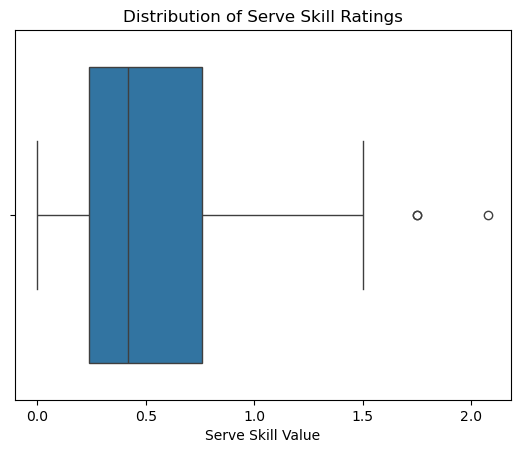

In [137]:
sns.boxplot(x=df["Serve"])
plt.title("Distribution of Serve Skill Ratings")
plt.xlabel("Serve Skill Value")
plt.show()

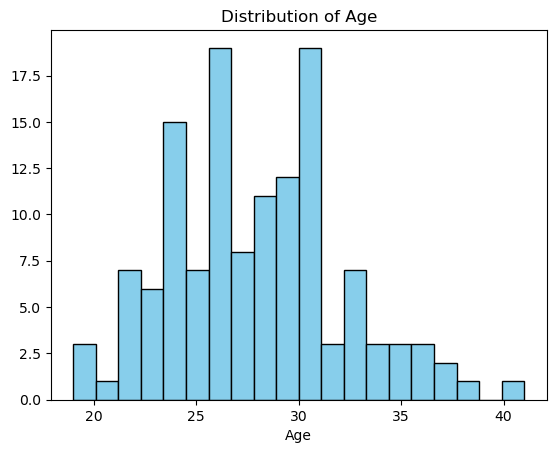

In [135]:
plt.hist(df['Age'],bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()


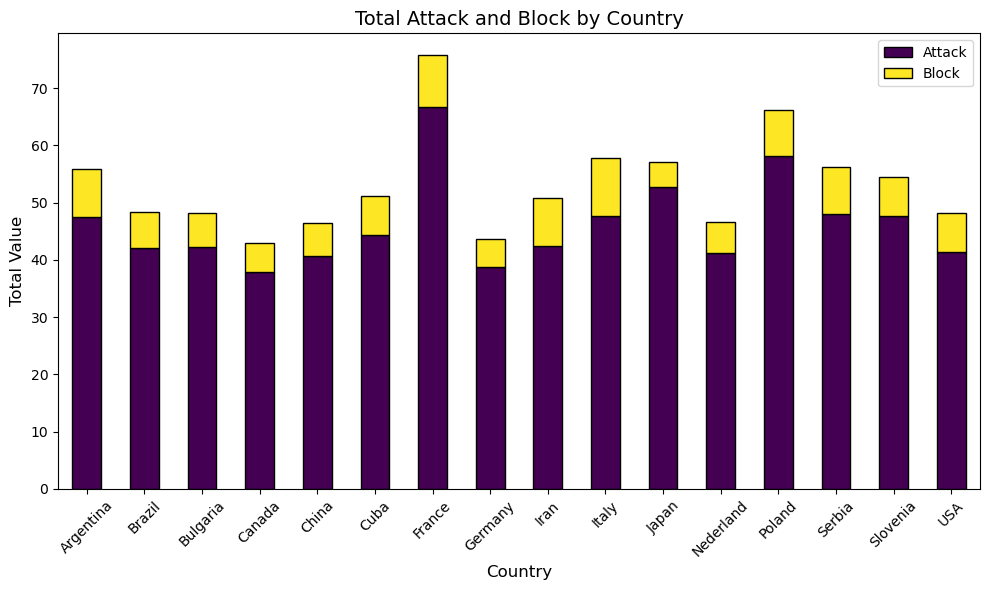

In [147]:
total_attack_block_by_country = df.groupby('Country')[['Attack', 'Block']].sum()

# Plotting the stacked bar chart
total_attack_block_by_country.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(10,6),  # to adjust figure size for better visibility
    edgecolor='black'  # adds borders for clearer separation
)

# Adding labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.title('Total Attack and Block by Country', fontsize=14)
plt.xticks(rotation=45)  # Rotates country names for better readability

plt.tight_layout()  # Ensures labels and title fit well
plt.show()